In [35]:
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def deterministicSIR(x,t,parameters):
    '''Returns right hand side of SIR model, beta corresponds to the paramaters'''
    try:
        rr = parameters['rr'].value
        a = parameters['a'].value
    except:
        rr, a = parameters
    S = x[0]
    I = x[1]
    R = x[2]
    y = np.zeros(3)
    y[0] = -rr*S*I
    y[1] = rr*S*I - a*I
    y[2] = a*I
    return y

def ODEsolution(x0, t, parameters):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(deterministicSIR, x0, t, args=(parameters,))
    return x

def residual(parameters, ts, data):
    ''' Calculate residual for optimization'''
    x0 = parameters['S0'].value, parameters['I0'].value, parameters['R0'].value
    model = ODEsolution(x0, ts, parameters)
    return (model - data).ravel()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 143
    # data points      = 300
    # variables        = 5
    chi-square         = 3317628.39
    reduced chi-square = 11246.1979
    Akaike info crit   = 2803.29348
    Bayesian info crit = 2821.81239
[[Variables]]
    S0:  4987.54346 +/- 20.8507463 (0.42%) (init = 2000)
    I0:  100.817154 +/- 6.55098527 (6.50%) (init = 200)
    R0:  7.70920304 +/- 21.3932418 (277.50%) (init = 50)
    rr:  5.0199e-04 +/- 7.6890e-06 (1.53%) (init = 0.01)
    a:   0.50048615 +/- 0.00465899 (0.93%) (init = 5)
[[Correlations]] (unreported correlations are < 0.100)
    C(I0, rr) = -0.957
    C(S0, R0) = -0.778
    C(S0, rr) = -0.526
    C(S0, I0) =  0.436
    C(I0, R0) = -0.424
    C(R0, rr) =  0.409
    C(R0, a)  = -0.400
    C(S0, a)  =  0.173
    C(rr, a)  =  0.136
    C(I0, a)  = -0.114


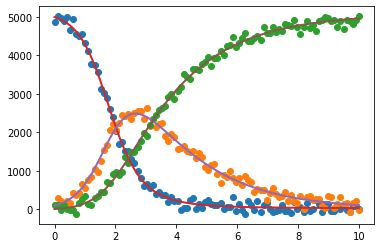

In [37]:
# Set up model
t = np.linspace(0, 10.0, 100)
x0 = np.array([5000, 100, 0])

# Generate "real" data
rr, a = 0.0005, 0.5
true_params = np.array((rr,a))
data = ODEsolution(x0, t, true_params)
data += np.random.normal([0,0,0], [100,100,100], size=data.shape)

# set initial guess of parameters and their bounds
params = Parameters()
params.add('S0', value= 2000.0, min=0, max=10000)
params.add('I0', value= 200.0, min=0, max=10000)
params.add('R0', value= 50.0, min=0, max=10000)
params.add('rr', value=0.01, min=0, max=10)
params.add('a', value=5, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

# display fitted statistics
report_fit(result)

In [34]:
result.